# Topic Visualization with Wordcloud, pyLDAvis

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from gensim import corpora, models
import os
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [38]:
dictionary = corpora.Dictionary.load(os.getenv('HOME') + '/patent_data/dummy_dictionary.dict')
tfidf_corpus = corpora.MmCorpus(os.getenv('HOME') + '/patent_data/dummy_corpus_tfidf.mm')
lsi = models.LsiModel(tfidf_corpus, id2word=dictionary, num_topics=100)
print('Finished loading LSI model.')
lda = models.LdaModel(tfidf_corpus, id2word=dictionary, num_topics=100)
print('Finished loading models.')

2017-12-19 13:24:12,349 : INFO : loading Dictionary object from /home/cameronbell/patent_data/dummy_dictionary.dict
2017-12-19 13:24:12,395 : INFO : loaded /home/cameronbell/patent_data/dummy_dictionary.dict
2017-12-19 13:24:12,447 : INFO : loaded corpus index from /home/cameronbell/patent_data/dummy_corpus_tfidf.mm.index
2017-12-19 13:24:12,449 : INFO : initializing corpus reader from /home/cameronbell/patent_data/dummy_corpus_tfidf.mm
2017-12-19 13:24:12,450 : INFO : accepted corpus with 100000 documents, 17658 features, 7572404 non-zero entries
2017-12-19 13:24:12,453 : INFO : using serial LSI version on this node
2017-12-19 13:24:12,454 : INFO : updating model with new documents
2017-12-19 13:24:19,019 : INFO : preparing a new chunk of documents
2017-12-19 13:24:19,361 : INFO : using 100 extra samples and 2 power iterations
2017-12-19 13:24:19,374 : INFO : 1st phase: constructing (17658, 200) action matrix
2017-12-19 13:24:19,872 : INFO : orthonormalizing (17658, 200) action matrix

Finished loading LSI model.


2017-12-19 13:25:27,354 : INFO : running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 100000 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2017-12-19 13:25:28,009 : INFO : PROGRESS: pass 0, at document #2000/100000
2017-12-19 13:25:33,332 : INFO : merging changes from 2000 documents into a model of 100000 documents
2017-12-19 13:25:34,039 : INFO : topic #91 (0.010): 0.012*"parison" + 0.009*"electrolyt" + 0.008*"mask" + 0.008*"oven" + 0.007*"chord" + 0.007*"dish" + 0.007*"shadow" + 0.007*"column" + 0.006*"sub" + 0.006*"cent"
2017-12-19 13:25:34,041 : INFO : topic #12 (0.010): 0.011*"mold" + 0.008*"steroid" + 0.007*"magnet" + 0.007*"diacryl" + 0.006*"process" + 0.006*"platform" + 0.006*"keto" + 0.006*"member" + 0.005*"furan" + 0.005*"sub"
2017-12-19 13:25:34,043 : INFO : topic #60 (0.010): 0.009*"glass" + 0.007*"puls" + 0.007*"caster" + 0.006*"

Finished loading models.


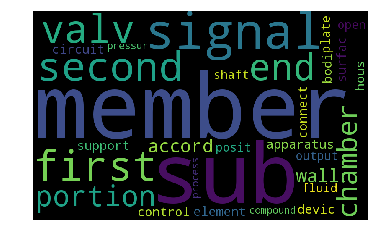

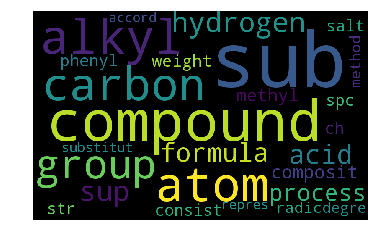

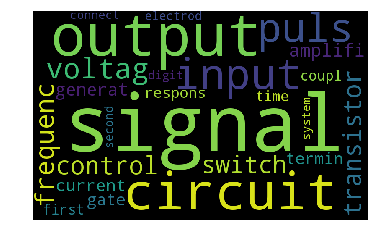

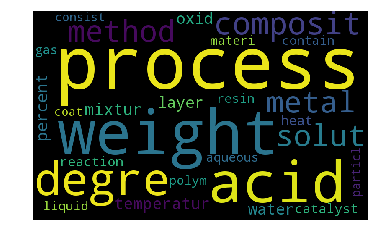

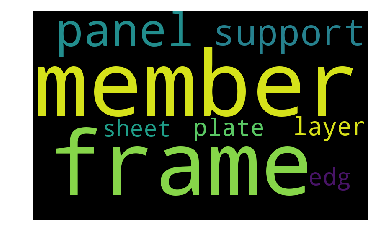

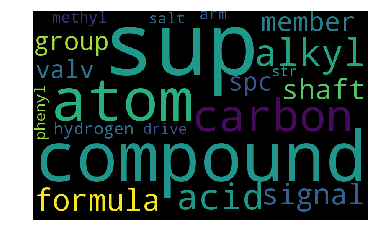

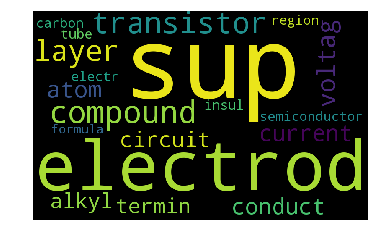

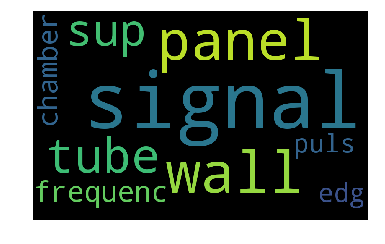

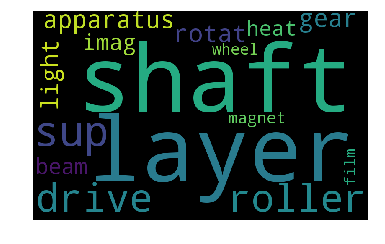

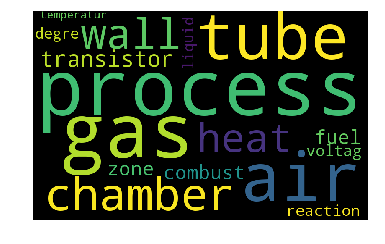

In [39]:
def show_wordcloud(topic, max_words):
    # Gather a dictionary of words and frequencies
    d = dict()
    for word, freq in lsi.show_topic(topic, max_words):
        d[word] = freq

    # Create the wordcloud
    wc = WordCloud(width=800, height=500, margin=5).generate_from_frequencies(d)

    # Show the wordcloud
    plt.figure()
    #plt.title('Topic %i' % topic)
    plt.axis("off")
    plt.imshow(wc)

for i in range(10):
    show_wordcloud(i, 30)

In [42]:
data = pyLDAvis.gensim.prepare(lda, tfidf_corpus, dictionary)
data

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
7      6.170644        1       1  0.335729 -0.129062
4      5.587183        1       2  0.318317 -0.114792
51     5.121260        1       3  0.254988 -0.017096
20     4.495279        1       4  0.324316 -0.136854
10     3.336685        1       5  0.312886 -0.105314
95     3.227239        1       6  0.301000 -0.110322
66     2.825141        1       7  0.139574  0.315426
0      2.803512        1       8  0.185829  0.287685
45     2.757607        1       9  0.046604  0.263119
43     2.523605        1      10  0.283428 -0.048694
80     2.449275        1      11  0.279550  0.005042
53     2.350163        1      12  0.278383 -0.071817
31     2.315480        1      13  0.246154 -0.035540
21     2.199931        1      14  0.280427 -0.135480
74     2.012217        1      15  0.290600 -0.073679
72     1.972487        1      16  0.103022  0.338401
99     1.783927        1      17  0.266138 -0.004629
69     1.740323        1      18  0.269640 -0.090160
59     1.614876        1      19  0.077049  0.324730
97     1.556116        1      20  0.236401 -0.149772
2      1.480701        1      21  0.255773 -0.050308
23     1.474530        1      22  0.237968 -0.147770
60     1.441657        1      23  0.105225  0.306110
42     1.436608        1      24  0.120835  0.265074
93     1.433799        1      25  0.144284 -0.031288
94     1.310222        1      26  0.111516  0.261594
50     1.141663        1      27  0.124292 -0.022844
6      0.939283        1      28  0.186927  0.014540
26     0.819748        1      29  0.118140  0.097537
44     0.807085        1      30  0.000104  0.224121
...         ...      ...     ...       ...       ...
28     0.365091        1      71 -0.114830 -0.040186
90     0.364946        1      72 -0.104351 -0.055670
91     0.363402        1      73 -0.122340 -0.021398
77     0.361809        1      74 -0.111289 -0.058339
85     0.359449        1      75 -0.103844  0.012775
32     0.346729        1      76 -0.130974  0.005950
47     0.342632        1      77 -0.139505 -0.006236
18     0.341941        1      78 -0.129773 -0.028098
78     0.339139        1      79 -0.102677 -0.068325
82     0.337487        1      80 -0.130134 -0.049100
33     0.334143        1      81 -0.121358 -0.021622
17     0.332410        1      82 -0.135527 -0.024652
81     0.331488        1      83 -0.138070 -0.030449
73     0.325465        1      84 -0.138684  0.003161
70     0.324184        1      85 -0.134996 -0.044284
40     0.317853        1      86 -0.134949 -0.019444
58     0.314357        1      87 -0.142799 -0.018535
12     0.304824        1      88 -0.148259 -0.035298
57     0.304136        1      89 -0.147185 -0.028350
39     0.302661        1      90 -0.142820 -0.046028
27     0.298519        1      91 -0.148283 -0.041615
75     0.290057        1      92 -0.148570 -0.049743
9      0.287370        1      93 -0.154573 -0.026792
87     0.287005        1      94 -0.155430 -0.043648
62     0.286165        1      95 -0.153615 -0.044098
1      0.280481        1      96 -0.149649 -0.046434
96     0.276535        1      97 -0.152468 -0.046796
92     0.274108        1      98 -0.157188 -0.035175
86     0.253693        1      99 -0.163206 -0.035663
16     0.252538        1     100 -0.162666 -0.048285

[100 rows x 5 columns], topic_info=       Category         Freq            Term        Total  loglift  logprob
term                                                                       
15400   Default  2619.000000             sub  2619.000000  30.0000  30.0000
7246    Default  1696.000000          signal  1696.000000  29.0000  29.0000
11070   Default  1577.000000        compound  1577.000000  28.0000  28.0000
10851   Default  1146.000000            valv  1146.000000  27.0000  27.0000
17291   Default  1006.000000           layer  1006.000000  26.0000  26.0000
16528   Default   832.000000        electrod   832.000000  25.

In [44]:
pyLDAvis.save_html(data,'vis.html')
print('Finished.')

Finished.
